# **Ejercicio**

Considera una caja con 4 cartas enumeradas del 1 al 4, suponga que extrae al azar dos cartas

a) ¿Cuál es el espacio muestral $S_1$ si las extracciones se realizan con reemplazo?

b) ¿Cuál es el espacio muestral $S_2$ si las extracciones se realizan sin reemplazo?

c) Utilizando simulación, calcule en ambos casos la probabilidad de que la primera carta sea un 3. Utilice $100,00$ simulaciones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_sim = 100_000
caja = np.array([1,2,3,4])

In [3]:
#Caso 1 extracciones con reemplazo
#simulacion es una matriz en donde cada renglón es un
#posible resultado y cada columna representa la i-ésima extración
simulacion = np.random.choice(caja, size = (n_sim, 2), replace = True)

#cuenta éxitos
exitos = np.sum(simulacion[:,0] == 3)

#aproxima probabilidad
prob = exitos / n_sim

print('Con reemplazo la probabilidad es', round(prob, 4))

Con reemplazo la probabilidad es 0.2487


In [4]:
#Caso 2 extracciones sin reemplazo
#Ya no es posible utilizar np.random.choice
#ValueError: Cannot take a larger sample than population when 'replace=False'

#Extrae una primera muestra
simulacion = np.random.choice(caja, size = 2, replace = False)

#extrae las muestras restantes
#y las agrega a simulación
for i in range(1, n_sim):
    nueva_muestra = np.random.choice(caja, size = 2, replace = False)
    simulacion = np.vstack( (simulacion, nueva_muestra) )
    
#cuenta éxitos
exitos = np.sum(simulacion[:,0] == 3)

#aproxima probabilidad
prob = exitos / n_sim

print('Con reemplazo la probabilidad es', round(prob, 4))

Con reemplazo la probabilidad es 0.2504


# Ejercicio

Suponga que tira dos dados (justos) al alzar. Calcule y grafique las probabilidades que la suma de sus caras sea $2, 3, \ldots, 12$.

Utilice $100,000$ simulaciones

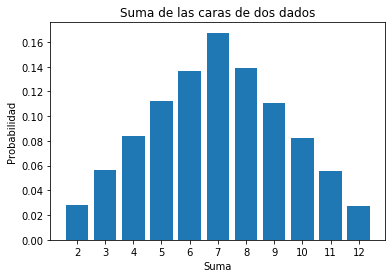

In [5]:
n_sim = 100_000
caras = np.arange(1, 7)

#matriz de n_sim x 2
simulaciones = np.random.choice(caras, size = (n_sim, 2))

#para guardar las probabilidades
probs = []

#posibles sumas
pos_sum = range(2, 13)

for s in pos_sum:
    #cuenta éxitos
    exitos = np.sum(simulaciones[:, 0] + simulaciones[:, 1] == s)
    
    #agrega probabilidad
    probs.append(exitos / n_sim)

#Crea la gráfica
plt.bar(pos_sum, probs)
plt.xticks(pos_sum, pos_sum)
plt.ylabel('Probabilidad')
plt.xlabel('Suma')
plt.title('Suma de las caras de dos dados')
plt.show()

# Ejercicio

Se tira una moneda $6$ veces, calcule lo siguiente:

* El número de águilas y soles sea el mismo.

* Exactamente aparecen dos águilas.

* Al menos dos águilas han aparecido.

Utilice $100,000$ simulaciones.

In [6]:
n_sim = 100_000
n_tiros = 6
moneda = ['A', 'S']
simulaciones = np.random.choice(moneda, size = (n_sim, n_tiros))

#contadores de éxito para cada pregunta
cont_ex_1 = 0
cont_ex_2 = 0
cont_ex_3 = 0

for reng in simulaciones:
    unicos, conteo = np.unique(reng, return_counts = True)
    
    #este if es para considerar el caso
    #en que sólo se tiene la misma cara
    #en los 6 tiros
    if len(conteo) > 1:
        #caso éxito pregunta 1
        if conteo[0] == conteo[1]:
            cont_ex_1 = cont_ex_1 + 1

    #caso éxito pregunta 2    
    if conteo[0] == 2:
        cont_ex_2 = cont_ex_2 + 1
    
    #caso éxito pregunta 3
    if conteo[0] >= 2:
        cont_ex_3 = cont_ex_3 + 1
        

#estima probabilidades
prob_1 = cont_ex_1 / n_sim        
prob_2 = cont_ex_2 / n_sim        
prob_3 = cont_ex_3 / n_sim        
print('Prob de águilas y soles iguales', round(prob_1, 4))    
print('Prob de exactamente 2 águilas', round(prob_2, 4))
print('Prob de al menos 2 águilas', round(prob_3, 4))

Prob de águilas y soles iguales 0.3123
Prob de exactamente 2 águilas 0.2354
Prob de al menos 2 águilas 0.9059


# Ejercicio

Supongamos que la población de una ciudad está compuesta por $40\%$ hombres y $60\%$ mujeres. Supongamos también que $50\%$ de los hombres y $30\%$ de las mujeres fuman. Encuentre la probabilidad de que un fumador sea hombre.

# Solución

Ya que 
$$
\mathbb{P}(H | F) = \dfrac{ \mathbb{P}(H \cap F) }{ \mathbb{P}(F) } \approx \dfrac{ N_{n}(H \cap F)} { N_{n}(F) }
$$

basta realizar el siguiente procedimiento.

* Seleccionar una persona
  * Si es hombre, determinar si fuma o no
    * Si fuma, incrementar $N_{n}(F)$ y $N_{n}(H \cap F)$
  * Si es mujer y fuma, incrementar $N_{n}(F)$  

In [10]:
n_sim = 100_000
genero = ['H', 'M']
fuma = ['si', 'no']
prob_gen = [0.4, 0.6]
#[si, no]
prob_fuma_m = [0.30, 0.70]
prob_fuma_h = [0.5, 0.5]

cont_f = 0
cont_h_f = 0

for _ in range(n_sim):
    #selecciona persona
    persona = np.random.choice(genero, p = prob_gen)
    
    #si es hombre determina si fuma o no
    if persona == 'H':
        f = np.random.choice(fuma, p = prob_fuma_h)
        if f == 'si':
            #incrementa contadores
            cont_f = cont_f + 1
            cont_h_f = cont_h_f + 1
            
    #Si es mujer, determina si fuma o no
    else:
        f = np.random.choice(fuma, p = prob_fuma_m)
        if f == 'si':
            cont_f = cont_f + 1
            
#Determina la probabilidad condicional
prob = cont_h_f / cont_f

#probabilidad verdadera
prob_true = (0.5 * 0.4) / (0.5 * 0.4 + 0.3 * 0.6)
print('La probabilidad estimada es', round(prob, 3))
print('La probabilidad verdadera es', round(prob_true, 3))
    

La probabilidad estimada es 0.528
La probabilidad verdadera es 0.526
